<H1>Job Market</H1>

Business Case:
How does the average salary for specific skill sets in different industries and cities compare to the overall market? Which cities and industries offer the most competitive salaries for in-demand skills?

How does the average salary for senior business intelligence analyst differ based on skill sets in different industry?
Which 

Analysis Step:
1. Load the data
2. Clean the data per each column
3. Analyze data distributions
4. Evaluate and Report


<h2>1. Load the Data</h2>

In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
#read the data
job = pd.read_csv('job_market_insight.csv', encoding='latin-1') #file was encoded using latin-1

print(f'Job Market Insight consists of {len(job)} rows and {len(job.columns)} columns. Below here shows the sample data:')
job.head(3)

Job Market Insight consists of 1796 rows and 13 columns. Below here shows the sample data:


,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
0,Systems and Data Analysts,Binance Accelerator Program - Data Analyst (Risk),Risk Analyst,Binance,Remote,NaN,"Python, Sql",ANY,Remote,Others,76000,89440,82720
1,Business and Marketing Analysts,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Remote,NaN,"Power Bi, Power BI, Excel",ANY,Remote,Others,65000,87000,76000
2,Business and Technical Analysts,Geophysicist/Data Analyst,Data Analyst,Sander Geophysics Limited,Ottawa,ON,Undef,ANY,In-Person,Technology,64123.59,86600,75361.795


<H2>2. Clean the Data</H2>

In [3]:
#find out missing data within each column
row_nan_count = job.isna().sum(axis=0)
print(f'Total missing data in each column \n{row_nan_count}')

Total missing data in each column 
Job Title          0
Job Info          20
Position           4
Employer           1
City               1
Province         144
Skill              0
Seniority         17
Work Type          2
Industry Type      0
Min_Salary        10
Max_Salary         4
Avg_Salary         6
dtype: int64


<h3>2.1. Clean Job Title - done</h3>

Text(0.5, 1.0, 'Job Title')

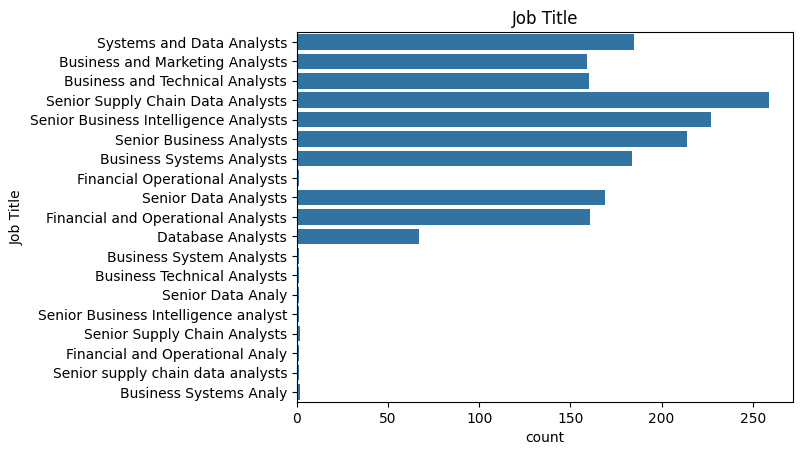

In [4]:
#there is no missing value within the Job Title data, we will see the distribution of the data
sns.countplot(data=job, y='Job Title', stat='count' )
plt.title('Job Title')

In [5]:
# Get the value counts for 'Job Title'
title_counts = job['Job Title'].value_counts()

# Filter titles that has some missed types
titles_typos = title_counts[title_counts < 5].index
titles_typos

Index(['Senior Supply Chain Analysts', 'Business Systems Analy',
       'Financial Operational Analysts', 'Business System Analysts',
       'Business Technical Analysts', 'Senior Data Analy',
       'Senior Business Intelligence analyst',
       'Financial and Operational Analy', 'Senior supply chain data analysts'],
      dtype='object', name='Job Title')

Text(0.5, 1.0, 'Job Title')

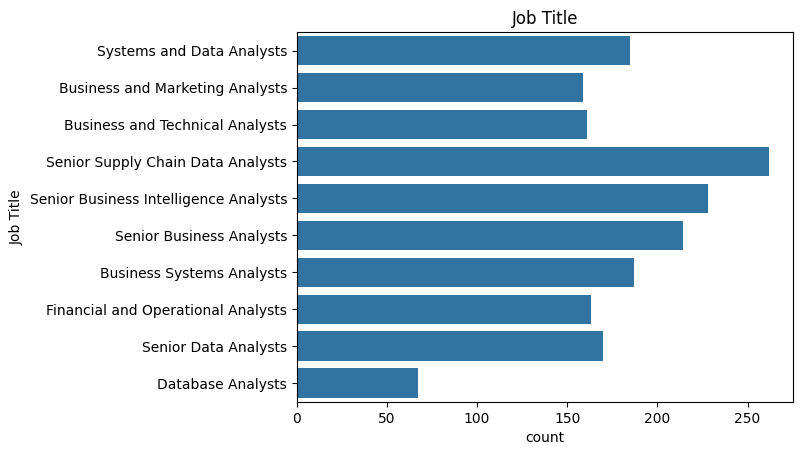

In [6]:
#fixing the typos in a form of dictionary
fixed_typos = ['Senior Supply Chain Data Analysts', 'Business Systems Analysts',
       'Financial and Operational Analysts', 'Business Systems Analysts',
       'Business and Technical Analysts', 'Senior Data Analysts',
       'Senior Business Intelligence Analysts',
       'Financial and Operational Analysts', 'Senior Supply Chain Data Analysts']
fixed_titles = dict(zip(titles_typos, fixed_typos))

#fixing the typos by replacing values based on key and index
job['Job Title'] = job['Job Title'].replace(fixed_titles)

#re-plot the data
sns.countplot(data=job, y='Job Title', stat='count')
plt.title('Job Title')


<h3>2.2 Clean Job Info</h3>

In [7]:
#Inspecting Job Info data
print(job['Job Info'].describe())

count                 1776
unique                 804
top       Business Analyst
freq                    88
Name: Job Info, dtype: object


In [8]:
#from the previous information, we know there are 20 missing values in job info
job[job['Job Info'].isna()]

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
92,Financial and Operational Analysts,NaN,Analyst,Flair Airlines Ltd.,Vancouver,BC,Crystal,ANY,In-Person,Others,50000,76458,63229
93,Business and Marketing Analysts,NaN,Business Analyst,TC Energie,Calgary,AB,"Power Bi, Power Platform",ANY,In-Person,Others,65000,87000,76000
94,Senior Business Analysts,NaN,Analyst,Lululemon,Vancouver,BC,"Python, Sql, Power BI, R",ANY,In-Person,Others,105800,138800,122300
124,Financial and Operational Analysts,NaN,Analyst,SYSCO FOOD SERVICES,Remote in Woodstock,ON,"Maple, Excel, Sql",ANY,Remote,Service,45016,93603,69309.5
147,Financial and Operational Analysts,NaN,Analyst,SYSCO FOOD SERVICES,Remote in Thunder Bay,ON,"Maple, Excel, Sql",ANY,Remote,Service,45016,93603,69309.5
199,Business and Marketing Analysts,NaN,NaN,Teleperformance,Toronto,ON,"Excel, Sql",ANY,In-Person,Others,65000,87000,76000
231,Senior Business Intelligence Analysts,NaN,Analyst,Spectra Aluminum Products,Bradford,ON,"Power Bi, Tableau, Qlikview",ANY,In-Person,Others,68000,88300,78150
249,Senior Business Analysts,NaN,Analyst,Allstate,Remote in Markham,ON,"C#, Python",Senior,Remote,Government,85000,133750,109375
559,Business and Technical Analysts,NaN,Analyst,Ledcor,Calgary,AB,"Excel, Database",ANY,In-Person,Others,64123.59,86600,75361.795
571,Business and Technical Analysts,NaN,Analyst,Ledcor,Vancouver,BC,"Excel, Database",ANY,In-Person,Others,64123.59,86600,75361.795


In [9]:
job['Job Info'].value_counts()

Job Info
Business Analyst                                             88
database analyst                                             49
Data Analyst                                                 35
business systems analyst                                     31
data analyst - informatics and systems                       29
                                                             ..
Revenue Operations Business Analyst                           1
Risk & Audit Analyst                                          1
Sr. Analyst, Business Intelligence                            1
Business Intelligence & Analytics Student-Fall 2024 Co-op     1
IM Business Analyst                                           1
Name: count, Length: 804, dtype: int64

In [10]:
job[job['Job Title']=='Business Systems Analysts']

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
17,Business Systems Analysts,Senior Business Systems Analyst,System Analyst,Royal Bank of Canada,Toronto,ON,"Sql, Big Data, Gap, Jira, Database",Senior,In-Person,Finance,85816.8,91520,88668.4
23,Business Systems Analysts,Business Data Analyst,Data Analyst,Accencis Group,Richmond Hill,ON,Undef,ANY,In-Person,Others,90480,90480,90480
26,Business Systems Analysts,Technology Risk Analyst,Risk Analyst,BMO Financial Group,Toronto,ON,Undef,ANY,In-Person,Finance,74800,138600,106700
51,Business Systems Analysts,Data Business Analyst,Business Analyst,"Bridgenext, Inc",Remote,NaN,"Azure, Sql, Python, Tableau, Excel, Databricks...",ANY,Remote,Others,85816.8,91520,88668.4
69,Business Systems Analysts,"analyst, business - computer systems",System Analyst,TechVest Global Solutions Inc.,Toronto,ON,Undef,NaN,In-Person,Technology,105000,105000,105000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,Business Systems Analysts,IT (information technology) business analyst,Business Analyst,KDigitalLabs INC,Toronto,ON,Python,ANY,In-Person,Technology,91520,91520,91520
1781,Business Systems Analysts,Business Systems Analyst,System Analyst,PressReader,Richmond,BC,"Power BI, Data modeling, SQL, Relational datab...",ANY,In-Person,Media,70000,85000,77500
1782,Business Systems Analysts,Business Systems Analyst,System Analyst,PressReader,Richmond,QC,"Power BI, Data modeling, SQL, Relational datab...",ANY,In-Person,Media,70000,85000,77500
1783,Business Systems Analysts,Business Systems Analyst,System Analyst,PressReader,Richmond,NB,"Power BI, Data modeling, SQL, Relational datab...",ANY,In-Person,Media,70000,85000,77500


<h4>2.3. Clean Position</h4>

In [11]:
job['Position'].value_counts()

Position
Analyst                 778
Business Analyst        325
Data Analyst            229
System Analyst          182
Data Engineer            41
BI Analyst               34
Risk Analyst             28
Developer                28
Lead                     24
Data Specialist          22
Data Consultant          16
Intern                   14
Logistic Analyst         11
Programmer                9
Manager                   8
Quantitative Analyst      7
Data Associate            6
Financial Analyst         6
Data Officer              5
Coordinator               3
Director                  3
Data Architect            3
Other                     3
Statistician              3
Data Scientist            2
Trainer                   1
Executive                 1
Name: count, dtype: int64

In [12]:
job[job['Position'].isna()]
#row 1138 might be better to remove too many nan values

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
199,Business and Marketing Analysts,NaN,NaN,Teleperformance,Toronto,ON,"Excel, Sql",ANY,In-Person,Others,65000,87000,76000
667,Senior Business Analysts,Senior Business Analyst,NaN,Aviso Wealth,Toronto,ON,Sql,NaN,In-Person,Others,87000,115000,101000
1138,Business and Marketing Analysts,NaN,NaN,NaN,NaN,NaN,"SQL, Data mining, Sales, SQL, Content strategy",ANY,Remote,Others,137280,180000,158640
1397,Senior Supply Chain Data Analysts,Supply Chain Analyst,NaN,American Iron and Metal,Hamilton,ON,"SQL, Supply chain, MRP, Statistics, No SQL",ANY,In-Person,Others,59000,65000,$62000


In [13]:
job[job['Employer']=='Teleperformance']

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
199,Business and Marketing Analysts,NaN,NaN,Teleperformance,Toronto,ON,"Excel, Sql",ANY,In-Person,Others,65000,87000,76000
1568,Business and Marketing Analysts,Business Analyst,Business Analyst,Teleperformance,Toronto,ON,"Sales support, SQL, Sales, SQL, Statistical an...",ANY,In-Person,Others,50000,57200,53600
1764,Senior Supply Chain Data Analysts,Quality Assurance Analyst,Analyst,Teleperformance,Toronto,ON,"Google Suite, Sales, Office Suite, Quality ass...",ANY,In-Person,Others,51000,57200,54100


In [14]:
job[job['Employer']=='American Iron and Metal']

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
328,Senior Data Analysts,Data analyst intern,Intern,American Iron and Metal,Montrï¿½ï¿½ï¿½ï,QC,"Excel, Database",Junior,In-Person,Others,69000,86000,77500
634,Senior Supply Chain Data Analysts,Supply Chain Analyst,Analyst,American Iron and Metal,Hamilton,ON,Excel,ANY,In-Person,Others,68500,87000,77750
648,Senior Supply Chain Data Analysts,Supply Chain Analyst,Analyst,American Iron and Metal,Hamilton,ON,Excel,ANY,In-Person,Others,68500,87000,77750
1016,Senior Data Analysts,Data analyst intern,Intern,American Iron and Metal,Montreal,QC,"SQL, Microsoft Access, Maximo, Statistics, No SQL",Junior,In-Person,Others,69000,86000,77500
1397,Senior Supply Chain Data Analysts,Supply Chain Analyst,NaN,American Iron and Metal,Hamilton,ON,"SQL, Supply chain, MRP, Statistics, No SQL",ANY,In-Person,Others,59000,65000,$62000


In [15]:
job[job['Employer']=='Aviso Wealth']

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
667,Senior Business Analysts,Senior Business Analyst,NaN,Aviso Wealth,Toronto,ON,Sql,NaN,In-Person,Others,87000,115000,101000
790,Senior Business Intelligence Analysts,"Business Analyst, Temporary",Business Analyst,Aviso Wealth,Toronto,ON,Sql,ANY,In-Person,Others,77000,95000,86000


In [16]:
#since there are some similiar job title within the same company, we will fill in the missing data by looking up the same value
job.loc[job['Position'].isna()]


,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
199,Business and Marketing Analysts,NaN,NaN,Teleperformance,Toronto,ON,"Excel, Sql",ANY,In-Person,Others,65000,87000,76000
667,Senior Business Analysts,Senior Business Analyst,NaN,Aviso Wealth,Toronto,ON,Sql,NaN,In-Person,Others,87000,115000,101000
1138,Business and Marketing Analysts,NaN,NaN,NaN,NaN,NaN,"SQL, Data mining, Sales, SQL, Content strategy",ANY,Remote,Others,137280,180000,158640
1397,Senior Supply Chain Data Analysts,Supply Chain Analyst,NaN,American Iron and Metal,Hamilton,ON,"SQL, Supply chain, MRP, Statistics, No SQL",ANY,In-Person,Others,59000,65000,$62000


In [17]:
#filling in missing value data with the value from the same employer and same job title

for index, row in job.loc[job['Position'].isna()].iterrows():
    temp = job[(job['Job Title']==row['Job Title']) & (job['Employer']==row['Employer']) &(job['Position'].isna() == False)]
    if len(temp)!=0:
        job.at[index,'Position'] = temp['Position'].values[0]

<h3>2.4. Clean City Data</h3>

less priority to clean

In [18]:
job[job['City'].isna()] #will remove the data

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
1138,Business and Marketing Analysts,NaN,NaN,NaN,NaN,NaN,"SQL, Data mining, Sales, SQL, Content strategy",ANY,Remote,Others,137280,180000,158640


In [19]:
job['City'].describe()

count        1795
unique        171
top       Toronto
freq          426
Name: City, dtype: object

In [20]:
t=job['City'].value_counts()
t[t<10].index

Index(['Sherbrooke', 'Vaughan', 'Windsor', 'Dorval', 'Langley', 'Thornhill',
       'Scarborough', 'Guelph', 'Abbotsford', 'Remote in Toronto',
       ...
       'Remote in Regina', 'New Westminster', 'Remote in Winnipeg',
       'Remote in Mississauga', 'Remote in London', 'Haldimand', 'Nepean',
       'Valcourt', 'Remote in Lakeside', 'Kahnawake'],
      dtype='object', name='City', length=144)

<h3>2.5. Clean Province Data</h3>

less priority to clean

In [21]:
job[job['Province'].isna()]

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
0,Systems and Data Analysts,Binance Accelerator Program - Data Analyst (Risk),Risk Analyst,Binance,Remote,NaN,"Python, Sql",ANY,Remote,Others,76000,89440,82720
1,Business and Marketing Analysts,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Remote,NaN,"Power Bi, Power BI, Excel",ANY,Remote,Others,65000,87000,76000
12,Senior Supply Chain Data Analysts,Business Analyst/Quality Assurance Analyst,Business Analyst,DLL,Burlington,NaN,"Jira, Excel, Reason, Database",ANY,In-Person,Others,75898,113847,94872.5
35,Financial and Operational Analysts,Payroll Analyst,Analyst,CloudMD Software & Services Inc - CAN,Remote,NaN,"Excel, Reason, Database",ANY,Remote,Technology,45000,57200,51100
36,Financial and Operational Analysts,Payroll Analyst,Analyst,CloudMD Software & Services Inc - CAN,Remote,NaN,"Excel, Reason, Database",ANY,Remote,Technology,45000,57200,51100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,Financial and Operational Analysts,Pricing Analyst,Analyst,IMCD,Canada,NaN,"JD Edwards, ERP systems, Tableau",ANY,In-Person,Others,50000,76458,63229
1729,Database Analysts,"analyst, database",Analyst,MANN INTERNATIONAL EDUCATION LTD.,Edmonton,NaN,"Python, Windows, Office Suite, Databases, Soft...",ANY,In-Person,Education,90272,90272,90272
1746,Senior Business Analysts,Netsuite Senior Business Analyst,Business Analyst,"Couchbase, Inc.",Remote,NaN,"NetSuite, APIs, No SQL",Senior,Remote,Others,66000,84500,75250
1775,Senior Business Analysts,Senior Logistics Analyst,Logistic Analyst,NewAge Products Inc,Canada,NaN,"Python, Crystal Reports, SQL, Microsoft Access...",Senior,In-Person,Others,66000,84500,75250


In [22]:
#fill in the data that is not remote by looking up at other value
for index, row in job.loc[job['Province'].isna()].iterrows():
    if row['Province'] != 'Remote':
        temp = job[(job['City']==row['City']) &(job['City'].isna() == False)]
        if len(temp)!=0:
            job.at[index,'Province'] = temp['Province'].values[0]

In [23]:
job[job['Province'].isna()]

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
0,Systems and Data Analysts,Binance Accelerator Program - Data Analyst (Risk),Risk Analyst,Binance,Remote,NaN,"Python, Sql",ANY,Remote,Others,76000,89440,82720
1,Business and Marketing Analysts,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Remote,NaN,"Power Bi, Power BI, Excel",ANY,Remote,Others,65000,87000,76000
12,Senior Supply Chain Data Analysts,Business Analyst/Quality Assurance Analyst,Business Analyst,DLL,Burlington,NaN,"Jira, Excel, Reason, Database",ANY,In-Person,Others,75898,113847,94872.5
35,Financial and Operational Analysts,Payroll Analyst,Analyst,CloudMD Software & Services Inc - CAN,Remote,NaN,"Excel, Reason, Database",ANY,Remote,Technology,45000,57200,51100
36,Financial and Operational Analysts,Payroll Analyst,Analyst,CloudMD Software & Services Inc - CAN,Remote,NaN,"Excel, Reason, Database",ANY,Remote,Technology,45000,57200,51100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,Senior Business Analysts,"Consultant, Senior Business Analyst",Data Consultant,Alimentiv,Remote,NaN,"Power BI, Azure, Waterfall, Process improvemen...",Senior,Remote,Others,66000,84500,75250
1686,Senior Supply Chain Data Analysts,HRIS Analyst & Report Specialist - Master's Le...,Data Specialist,Vosyn,Remote,NaN,"Power BI, SQL, R, Statistics, Tableau",Senior,Remote,Others,66560,72800,69680
1718,Financial and Operational Analysts,Pricing Analyst,Analyst,IMCD,Canada,NaN,"JD Edwards, ERP systems, Tableau",ANY,In-Person,Others,50000,76458,63229
1746,Senior Business Analysts,Netsuite Senior Business Analyst,Business Analyst,"Couchbase, Inc.",Remote,NaN,"NetSuite, APIs, No SQL",Senior,Remote,Others,66000,84500,75250


<h3>2.6 Clean Skill</h3>

In [130]:
#calcuate count of skills needed
coba.head(2)

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
0,Systems and Data Analysts,Binance Accelerator Program - Data Analyst (Risk),Risk Analyst,Binance,Remote,NaN,"Python, Sql",Any,Remote,Other,76000,89440,82720
1,Business and Marketing Analysts,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Remote,NaN,"Power Bi, Power BI, Excel",Any,Remote,Other,65000,87000,76000


In [163]:
#clean job info

job['Skill Clean'] = job.apply(lambda row: set(list(row.Skill.upper().replace(', ',',').split(','))), axis = 1)
job['Count Skill'] = job.apply()
job.head(2)


,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary,Skill Clean
0,Systems and Data Analysts,Binance Accelerator Program - Data Analyst (Risk),Risk Analyst,Binance,Remote,NaN,"Python, Sql",Any,Remote,Other,76000.0,89440.0,82720.0,"{PYTHON, SQL}"
1,Business and Marketing Analysts,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Remote,NaN,"Power Bi, Power BI, Excel",Any,Remote,Other,65000.0,87000.0,76000.0,"{EXCEL, POWER BI}"


In [161]:
job.loc[1]

Job Title        Business and Marketing Analysts
Job Info                        Business Analyst
Position                        Business Analyst
Employer           Canadian Nuclear Laboratories
City                                      Remote
Province                                     NaN
Skill                  Power Bi, Power BI, Excel
Seniority                                    Any
Work Type                                 Remote
Industry Type                              Other
Min_Salary                               65000.0
Max_Salary                               87000.0
Avg_Salary                               76000.0
Skill Clean        { EXCEL, POWER BI,  POWER BI}
Name: 1, dtype: object

<h3>2.7. Clean Seniority Level</h3>

In [32]:
job[['Seniority'].value_counts()

Seniority
ANY       1347
Senior     361
Mid         36
Junior      33
senior       2
Name: count, dtype: int64

In [42]:
job[job['Seniority'].isna()].head()

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
9,Senior Supply Chain Data Analysts,OPGT MOD ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï...,Business Analyst,Softline Technology,Toronto,ON,"Sql, Gap, Power BI",NaN,In-Person,Technology,68500,87000,77750
29,Business and Marketing Analysts,Business Analyst,Business Analyst,Banff Caribou Properties Ltd.,Banff,AB,Sql,NaN,In-Person,Automotive,65000,87000,76000
69,Business Systems Analysts,"analyst, business - computer systems",System Analyst,TechVest Global Solutions Inc.,Toronto,ON,Undef,NaN,In-Person,Technology,105000,105000,105000
585,Senior Business Intelligence Analysts,Business Process Analyst,Analyst,ENERCARE,Markham,ON,"Excel, Tableau, Sql, Gap, Power Bi",NaN,In-Person,Automotive,68000,88300,78150
615,Senior Business Analysts,Business Analyst Senior 7698-1809,Business Analyst,Foilcon,Toronto,ON,Undef,NaN,In-Person,Technology,66000,84500,75250


In [41]:
#change senior into Senior
job['Seniority'] = job['Seniority'].str.capitalize()
job['Seniority'].value_counts()

Seniority
Any       1347
Senior     363
Mid         36
Junior      33
Name: count, dtype: int64

In [51]:
print(f'Null values before treatment: {len(job[job['Seniority'].isna()])}')

#check the trend if the seniority of the job title 
#sns.countplot(data=job[job['Job Title'] in 'Senior'], y='Job Title', hue='Seniority')

#fill in missing value with senior if the job title has 'Senior' word in it
for index,row in job[job['Seniority'].isna()].iterrows():
    if 'Senior' in str(row['Job Title']):
        job.at[index, 'Seniority'] = 'Senior'
        
print(f'Null values after treatment: {len(job[job['Seniority'].isna()])}')

Null values before treatment: 8
Null values after treatment: 8


<h3>2.8. Clean Work Type</h3>

In [24]:
job['Work Type'].value_counts()

Work Type
In-Person    1635
Remote        138
Hybrid         21
Name: count, dtype: int64

In [25]:
#find out about the null value within the work type
job[job['Work Type'].isna()]

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
144,Financial and Operational Analysts,"Analyst, Local Sales Pricing",Analyst,SYSCO FOOD SERVICES,Remote in Toronto,ON,"Maple, Excel, Sql",ANY,NaN,Service,45016,93603,69309.5
362,Senior Supply Chain Data Analysts,"Analyst II, Expansion Credit",Analyst,Affirm,Remote,NaN,"Python, Machine Learning, Sql",Mid,NaN,Legal,109000,159000,134000


In [26]:
#fill in the null value with 'Remote' since the City inform the job that it will be remote
job['Work Type'].fillna('Remote',inplace=True)

/var/folders/9f/klpz4yzx3hq9bcs22_drg0740000gn/T/ipykernel_5688/1240575744.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  job['Work Type'].fillna('Remote',inplace=True)


In [27]:
job[job['Work Type'].isna()]

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary


<h3>2.9. Clean Industry Type</h3>

In [28]:
job['Industry Type'].value_counts()

Industry Type
Others                941
Technology            342
Healthcare            121
Finance               102
Service                59
Consulting             50
Automotive             26
Energy                 23
Education              18
Government             15
Construction           15
Transportation         12
Media                  10
Real Estate            10
Manufacturing           8
Telecommunications      8
Aerospace               7
Other                   7
Legal                   7
Insurance               6
Travel                  4
Retail                  3
Agriculture             2
Name: count, dtype: int64

In [29]:
#need to change other to others
job['Industry Type'] = job['Industry Type'].str.replace('Others', 'Other')

In [30]:
job['Industry Type'].value_counts()

Industry Type
Other                 948
Technology            342
Healthcare            121
Finance               102
Service                59
Consulting             50
Automotive             26
Energy                 23
Education              18
Government             15
Construction           15
Transportation         12
Media                  10
Real Estate            10
Manufacturing           8
Telecommunications      8
Aerospace               7
Legal                   7
Insurance               6
Travel                  4
Retail                  3
Agriculture             2
Name: count, dtype: int64

<h3>Clean Salary Data</h3>

In [121]:
#remove all currcency codes
job['Min_Salary']=job['Min_Salary'].str.replace('$','')
job['Max_Salary']=job['Max_Salary'].str.replace('$','')
job['Avg_Salary']=job['Avg_Salary'].str.replace('$','')

#handling missing value for the minimum salary
print(f'Min Salary Missing Value: {len(job[job['Min_Salary'].isna()])}')
print(f'Max Salary Missing Value: {len(job[job['Max_Salary'].isna()])}')
print(f'Avg Salary Missing Value: {len(job[job['Avg_Salary'].isna()])}')

"""
filling missing value by looking up other data:
1. find median salary with the same job title, seniority, and same company
2. find the mean of minimum salary with the same job title and seniority
"""

def fill_salary(row_missing, salary_type):
    jobn = job[job[salary_type].notna()]

    
    
    same_title = jobn[jobn['Job Title']==row_missing['Job Title']]
    same_seniority = same_title[same_title['Seniority']==row_missing['Seniority']]
    same_company = same_seniority[same_seniority['Employer']==row_missing['Employer']]
    if len(same_company) >0:
        return pd.to_numeric(same_company[salary_type]).median()
    elif len(same_seniority)>0:
        return pd.to_numeric(same_seniority[salary_type]).median()
    else:
        return pd.to_numeric(same_title[salary_type]).median()

    

#handling minimum salary missing value
for index, row in job[job['Min_Salary'].isna()].iterrows():
    job.loc[index,'Min_Salary'] = fill_salary(row,'Min_Salary')

#handling maximum salary missing value
for index, row in job[job['Max_Salary'].isna()].iterrows():
    job.loc[index,'Max_Salary'] = fill_salary(row,'Max_Salary')

#handling averaga salary missing value
for index, row in job[job['Avg_Salary'].isna()].iterrows():
    job.loc[index,'Avg_Salary'] = fill_salary(row,'Avg_Salary')

print(f'Min Salary Missing Value After handling: {len(job[job['Min_Salary'].isna()])}')
print(f'Max Salary Missing Value After handling: {len(job[job['Max_Salary'].isna()])}')
print(f'Avg Salary Missing Value After handling: {len(job[job['Avg_Salary'].isna()])}')

Min Salary Missing Value: 10
Max Salary Missing Value: 4
Avg Salary Missing Value: 6
Min Salary Missing Value After handling: 0
Max Salary Missing Value After handling: 0
Avg Salary Missing Value After handling: 0


In [137]:
#sanity check: min, max and avg salary should be a number
job[['Min_Salary','Max_Salary','Avg_Salary']] = job[['Min_Salary','Max_Salary','Avg_Salary']].apply(pd.to_numeric)
job[['Min_Salary','Max_Salary','Avg_Salary']].describe()

,Min_Salary,Max_Salary,Avg_Salary
count,1.796000e+03,1796.000000,1796.000000
mean,6.917100e+04,88062.633146,78416.160521
std,3.212077e+04,20315.754279,18123.879418
min,-8.736000e+04,1.000000,62.500000
25%,6.000000e+04,79030.000000,69500.000000
50%,6.800000e+04,87000.000000,77750.000000
75%,7.983963e+04,93600.000000,87770.800000
max,1.160000e+06,180000.000000,158640.000000


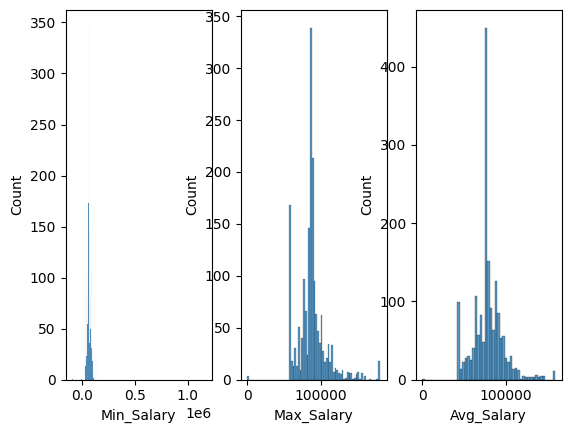

In [141]:
#visualizing salary data, there are some outlier within the data
fig, axis = plt.subplots(1,3)
sns.histplot(data=job, x='Min_Salary', ax=axis[0])
sns.histplot(data=job, x='Max_Salary', ax=axis[1])
sns.histplot(data=job, x='Avg_Salary', ax=axis[2])
plt.show()

In [127]:
invalid_index = []

#sanity check

for index, row in job.iterrows():
    if float(row['Min_Salary']) > float(row['Max_Salary']) or float(row['Min_Salary']) > float(row['Avg_Salary']):
        invalid_index.append(index)
    #checking if the minimum/maximum/average salary is less than 1000
    if float(row['Min_Salary']) < 10000 or float(row['Max_Salary']) <1000 or float(row['Avg_Salary']) <1000:
        invalid_index.append(index)
    

print(invalid_index)

[46, 46, 515, 651, 1132, 1132, 1147, 1217, 1217, 1310, 1676, 1692, 1692, 1773]


In [ ]:
#handling invalid index